In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import random
goal_c=11
goal_r=0
# core algorithm
epsilon_value = 0.1   # assume
alpha = 0.5  #learning rate
gamma = 0.9  #discount rate
wind_prob = 0.5  
episodes = 500 
runs = 50  
M = 10000
steps=np.zeros((runs,episodes))
G_all=np.zeros((runs,episodes))
dum_a = np.array([0,1,2,3])
grid_rewards = np.array([[0, 0, 0, 0,  0,  0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0,  0,  0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, -1,  -1,  -1, -1, -1, -1, 0, 0, 0],
              [0, 0, 0, -1,  -2,  -2, -2, -2, -1, 0, 0, 0],
              [0, 0, 0, -1,  -2,  -3, -3, -2, -1, 0, 0, 0],
              [0, 0, 0, -1,  -2,  -3, -2, -2, -1, 0, 0, 0],
              [0, 0, 0, -1,  -2,  -3, -2, -1, -1, 0, 0, 0],
              [0, 0, 0, -1,  -2,  -2, -2, -1, 0, 0, 0, 0],
              [0, 0, 0, -1,  -1,  -1, -1, -1, 0, 0, 0, 0],
              [0, 0, 0, 0,  0,  0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0,  0,  0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0,  0,  0, 0, 0, 0, 0, 0, 0]]).astype("float32")
grid_rewards[goal_r,goal_c]=10

In [59]:
def statechangefn(act_sel,s_r,s_c):
    dum_b=set(dum_a) - set([act_sel])
    pr_action = np.zeros_like(dum_a).astype(float)
    pr_action[act_sel,]=gamma
    pr_action[list(dum_b)]=(1-gamma)/3
    cum_prob = np.cumsum(pr_action)
    sel_direction= np.digitize(random.uniform(0,1),cum_prob)
    if sel_direction == 0:
        s_new_r = s_r -1 
        s_new_c = s_c
    elif sel_direction == 1:
        s_new_r = s_r  
        s_new_c = s_c + 1         
    elif sel_direction == 2:
        s_new_r = s_r + 1
        s_new_c = s_c        
    elif sel_direction == 3:
        s_new_r = s_r  
        s_new_c = s_c - 1
        
    # States after hitting wall remains unchanged (ROWS)
    if s_new_r == -1:
        s_new_r = 0
    elif s_new_r == 12:
        s_new_r = 11
        
    #States after hitting wall remains unchanged (COLUMN)
    if s_new_c == -1:
        s_new_c = 0
    elif s_new_c == 12:
        s_new_c = 11
        
    # wind effect
    if random.uniform(0,1)< wind_prob:
        s_new_c = s_new_c + 1
        
    # after hitting wall remains unchanged (COLUMN)
    if s_new_c == 12:
        s_new_c = 11
        
    return s_new_r, s_new_c

In [60]:
for r in range(runs):
    print(r)
    #initial action value function
    q_value = np.random.randint(0,10, (4, 12, 12)).astype(float)/10
    q_value[:,goal_r,goal_c]=0
    for e in range(episodes):
        # select one among the four start states
        start_r=np.random.choice([5, 6, 10, 11])
        start_c = 0 # first column
        s_r = start_r
        s_c = start_c
        G = 0 
        for k in range(M):
            if s_r == goal_r and s_c == goal_c: 
                break
            elif np.random.uniform(0,1)> epsilon_value:
                act_sel=np.argmax(q_value[:,s_r, s_c])
            else:
                act_sel=np.random.choice([0,1, 2, 3])
            
        # Obtaining new states from current state and epsilon greedy action
            [s_new_r,s_new_c] = statechangefn(act_sel,s_r, s_c)
            q_value[act_sel,s_r, s_c] = q_value[act_sel,s_r, s_c] + alpha*(grid_rewards[s_new_r, s_new_c]  + gamma*max(q_value[:,s_r, s_c]) - q_value[act_sel,s_r, s_c])
            G = G + gamma**(k)*grid_rewards[s_new_r,s_new_c]
            s_r = s_new_r
            s_c = s_new_c
    
        steps[r,e]=k
        G_all [r,e] = G
avg_steps = np.mean(steps,0)
avg_G = np.mean(G_all,0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


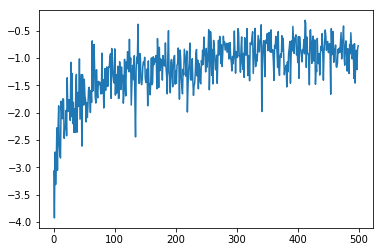

In [62]:
plt.plot(avg_G)
plt.show()

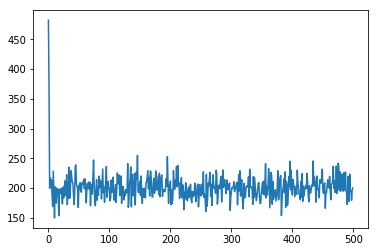

In [61]:
plt.plot(avg_steps)
plt.show()